In [ ]:
!pip install tensorflow
!pip install syft
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn


In [ ]:
import pandas as pd

# Replace this with the path to your dataset
dataset_path = '/content/dataset_sdn.csv'

# Load the dataset
data = pd.read_csv(dataset_path)

# Display the first few rows
print(data.head())


      dt  switch       src       dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  10.0.0.1  10.0.0.8     45304   48294064  100  716000000   
1  11605       1  10.0.0.1  10.0.0.8    126395  134737070  280  734000000   
2  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
3  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   
4  11425       1  10.0.0.2  10.0.0.8     90333   96294978  200  744000000   

        tot_dur  flows  ...  pktrate  Pairflow  Protocol  port_no   tx_bytes  \
0  1.010000e+11      3  ...      451         0       UDP        3  143928631   
1  2.810000e+11      2  ...      451         0       UDP        4       3842   
2  2.010000e+11      3  ...      451         0       UDP        1       3795   
3  2.010000e+11      3  ...      451         0       UDP        2       3688   
4  2.010000e+11      3  ...      451         0       UDP        3       3413   

  rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
0     39

In [ ]:
# Check for missing values in the dataset
print(data.isnull().sum())


dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64


In [ ]:
# Impute missing values in 'rx_kbps' and 'tot_kbps' with the mean
data['rx_kbps'].fillna(data['rx_kbps'].mean(), inplace=True)
data['tot_kbps'].fillna(data['tot_kbps'].mean(), inplace=True)

# Verify if the missing values are handled
print(data.isnull().sum())


dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64


<ipython-input-6-2b3ab40d16fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rx_kbps'].fillna(data['rx_kbps'].mean(), inplace=True)
<ipython-input-6-2b3ab40d16fa>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
# Impute missing values in 'rx_kbps' and 'tot_kbps' with the mean (without inplace)
data['rx_kbps'] = data['rx_kbps'].fillna(data['rx_kbps'].mean())
data['tot_kbps'] = data['tot_kbps'].fillna(data['tot_kbps'].mean())

# Verify if the missing values are handled
print(data.isnull().sum())


dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for 'Protocol' (this is a column with a small number of unique values)
label_encoder = LabelEncoder()
data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

# One-hot encoding for 'src' and 'dst' (columns with multiple unique categories)
data = pd.get_dummies(data, columns=['src', 'dst'], drop_first=True)

# Verify the dataset after encoding
print(data.head())


      dt  switch  pktcount  bytecount  dur   dur_nsec       tot_dur  flows  \
0  11425       1     45304   48294064  100  716000000  1.010000e+11      3   
1  11605       1    126395  134737070  280  734000000  2.810000e+11      2   
2  11425       1     90333   96294978  200  744000000  2.010000e+11      3   
3  11425       1     90333   96294978  200  744000000  2.010000e+11      3   
4  11425       1     90333   96294978  200  744000000  2.010000e+11      3   

   packetins  pktperflow  ...  dst_10.0.0.17  dst_10.0.0.18  dst_10.0.0.2  \
0       1943       13535  ...          False          False         False   
1       1943       13531  ...          False          False         False   
2       1943       13534  ...          False          False         False   
3       1943       13534  ...          False          False         False   
4       1943       13534  ...          False          False         False   

   dst_10.0.0.3  dst_10.0.0.4  dst_10.0.0.5  dst_10.0.0.6  dst_10.0.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of columns to scale (numeric columns)
numeric_columns = ['pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows',
                   'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow',
                   'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']

# Apply the scaler to these columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Verify the dataset after scaling
print(data.head())


      dt  switch  pktcount  bytecount       dur  dur_nsec   tot_dur     flows  \
0  11425       1 -0.145262   0.207217 -0.781249  0.919175 -0.779412 -0.899733   
1  11605       1  1.413491   1.979416 -0.146367  0.984157 -0.144270 -1.238714   
2  11425       1  0.720298   1.191301 -0.428537  1.020258 -0.426555 -0.899733   
3  11425       1  0.720298   1.191301 -0.428537  1.020258 -0.426555 -0.899733   
4  11425       1  0.720298   1.191301 -0.428537  1.020258 -0.426555 -0.899733   

   packetins  pktperflow  ...  dst_10.0.0.17  dst_10.0.0.18  dst_10.0.0.2  \
0  -0.619631    0.966041  ...          False          False         False   
1  -0.619631    0.965501  ...          False          False         False   
2  -0.619631    0.965906  ...          False          False         False   
3  -0.619631    0.965906  ...          False          False         False   
4  -0.619631    0.965906  ...          False          False         False   

   dst_10.0.0.3  dst_10.0.0.4  dst_10.0.0.5  dst_1

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop(columns=['label'])  # Features (exclude the target column)
y = data['label']  # Target variable (label)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 83476 samples
Test set size: 20869 samples


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model using the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 81.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     12722
           1       0.79      0.71      0.75      8147

    accuracy                           0.82     20869
   macro avg       0.81      0.80      0.80     20869
weighted avg       0.81      0.82      0.81     20869



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


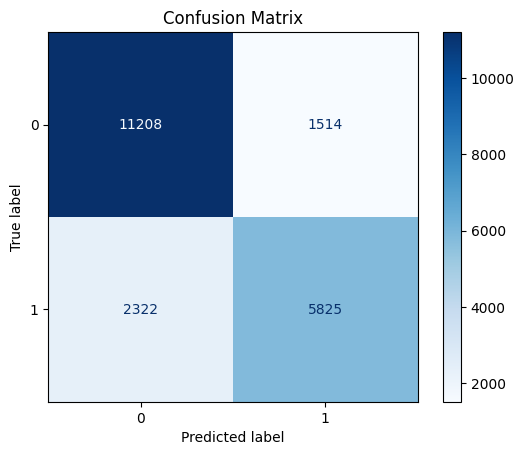

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the predicted labels from the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'newton-cg', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit on the training data
grid_search.fit(X_train, y_train)

# Get best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train your model on the resampled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets (if not already done)
X = data.drop('label', axis=1)  # Features
y = data['label']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (if not done already)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Model has been trained
print("Model trained successfully.")


Model trained successfully.


Accuracy: 83.99%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     12722
           1       0.83      0.75      0.78      8147

    accuracy                           0.84     20869
   macro avg       0.84      0.82      0.83     20869
weighted avg       0.84      0.84      0.84     20869


Confusion Matrix:
[[11445  1277]
 [ 2064  6083]]


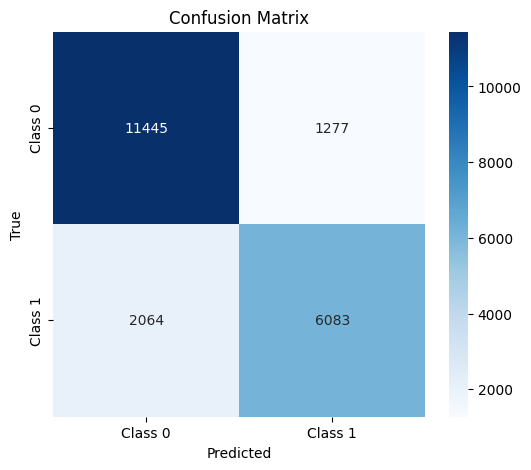

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix with a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Top 10 important features:
          Feature  Importance
12       Pairflow    1.110204
13       Protocol    1.103911
3       bytecount    1.014714
2        pktcount    0.858770
20  src_10.0.0.10    0.760816
23  src_10.0.0.13    0.510766
28  src_10.0.0.18    0.500289
50   dst_10.0.0.5    0.410587
30  src_10.0.0.20    0.407746
24  src_10.0.0.14    0.398040


<ipython-input-19-5c466c234d1f>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


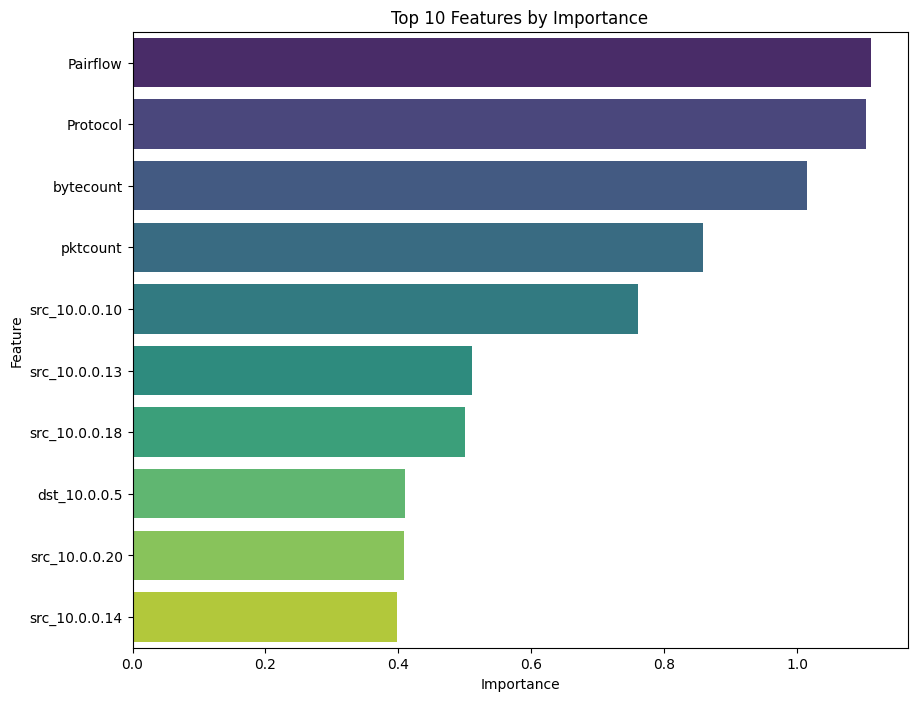

In [ ]:
# Get the feature importance from the logistic regression model
importance = model.coef_[0]

# Create a DataFrame to view feature importance
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print("Top 10 important features:")
print(feature_importance.head(10))

# Plotting feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Features by Importance')
plt.show()


In [ ]:
# Assuming new_data is the new dataset (similar structure to the training data)
# new_data = pd.read_csv('new_data.csv')

# Preprocessing the new data (apply the same scaling and transformations as before)
########new_data_scaled = scaler.transform(new_data)

# Predicting using the trained model
########predictions = model.predict(new_data_scaled)

# Print the predictions
#######print("Predictions on new data:")
#######print(predictions)

# If you want to evaluate on the new data (if ground truth labels are available)
# true_labels = new_data['label']  # replace with actual labels if available
# print("Accuracy on new data:", accuracy_score(true_labels, predictions))


#for testing on new data if possible


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")


Cross-validation accuracy scores: [0.83439147 0.83522013 0.83989218 0.83492063 0.83312369]
Mean cross-validation accuracy: 0.8355096209467385


In [ ]:
# Evaluate the model on the test set
test_accuracy = model.score(X_test_scaled, y_test)

# Print test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 83.99%


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'final_model.pkl')

# Optionally, save the scaler as well for future use
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [ ]:
# Assuming X_test is the test feature set
# Preprocess the test data using the same scaler
X_test_scaled = loaded_scaler.transform(X_test)

# Predict the labels on the test set using the loaded model
test_predictions = loaded_model.predict(X_test_scaled)

# Output the predictions
print(test_predictions)

# Optionally, you can evaluate the predictions with a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, test_predictions))


[1 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     12722
           1       0.83      0.75      0.78      8147

    accuracy                           0.84     20869
   macro avg       0.84      0.82      0.83     20869
weighted avg       0.84      0.84      0.84     20869



In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Adjust class weights (pass numpy array instead of list)
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_resampled)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Initialize Random Forest Classifier (you can also use Logistic Regression with class_weight='balanced')
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_classifier.fit(X_resampled, y_resampled)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9998562461066653
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12722
           1       1.00      1.00      1.00      8147

    accuracy                           1.00     20869
   macro avg       1.00      1.00      1.00     20869
weighted avg       1.00      1.00      1.00     20869

Confusion Matrix:
 [[12719     3]
 [    0  8147]]


In [ ]:
import joblib

# Save the trained model
joblib.dump(rf_classifier, 'random_forest_model.pkl')

# Save the scaler if you applied any scaling
joblib.dump(loaded_scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
# Evaluate the model on the test data (which you already have)
test_data = X_test  # Test features (assuming you've split your data previously)
test_labels = y_test  # True labels

# Make predictions
test_predictions = loaded_model.predict(test_data)

# Evaluate model performance on the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print accuracy score
print(f"Test Accuracy: {accuracy_score(test_labels, test_predictions)}")

# Print classification report
print("Classification Report:")
print(classification_report(test_labels, test_predictions))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, test_predictions))


Test Accuracy: 0.9998562461066653
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12722
           1       1.00      1.00      1.00      8147

    accuracy                           1.00     20869
   macro avg       1.00      1.00      1.00     20869
weighted avg       1.00      1.00      1.00     20869

Confusion Matrix:
[[12719     3]
 [    0  8147]]


Checking Overfitting


In [ ]:
# Evaluate the model on the training data
train_predictions = loaded_model.predict(X_resampled)
train_accuracy = accuracy_score(y_resampled, train_predictions)

# Generate classification report for the training data
train_classification_report = classification_report(y_resampled, train_predictions)

# Confusion Matrix for training data
train_confusion_matrix = confusion_matrix(y_resampled, train_predictions)

# Display results
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Train Classification Report:")
print(train_classification_report)
print("Train Confusion Matrix:")
print(train_confusion_matrix)


Train Accuracy: 100.00%
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50839
           1       1.00      1.00      1.00     50839

    accuracy                           1.00    101678
   macro avg       1.00      1.00      1.00    101678
weighted avg       1.00      1.00      1.00    101678

Train Confusion Matrix:
[[50839     0]
 [    0 50839]]


Applying Regularization to overcome overfitting


Cross-validation accuracy scores: [0.99263297 0.99269242 0.993531   0.98957772 0.99065588]
Mean cross-validation accuracy: 0.9918179978081344
Test Accuracy: 0.9914226843643682
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12722
           1       0.98      1.00      0.99      8147

    accuracy                           0.99     20869
   macro avg       0.99      0.99      0.99     20869
weighted avg       0.99      0.99      0.99     20869



<Axes: >

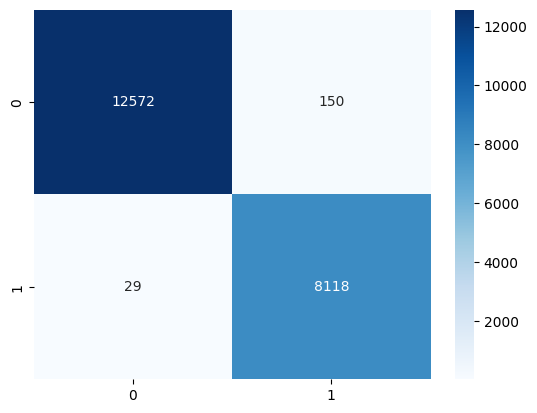

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize Random Forest with limited complexity to prevent overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,            # Number of trees
    max_depth=10,                # Limit the depth of trees
    min_samples_split=20,        # Require at least 20 samples to split a node
    min_samples_leaf=10,         # Require at least 10 samples in leaf nodes
    random_state=42
)

# Cross-validation to evaluate performance
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')

# Fit the model on the full training set
rf_model.fit(X_train, y_train)

# Test the model on the test set
y_pred = rf_model.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy}')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])


In [ ]:
print(X_train.shape)  # This will print the number of rows and columns in the training set.


(83476, 55)
